In [83]:
import numpy as np
import matplotlib.pyplot as plt

In [84]:
# Configuration
D = 2 # Vector Dimesion, we usually use 2 x,y
K = 3 # number of clusterings
N = 300 # number of data points

In [85]:
# Create the data of 3 means you can create any 3 means
mu1 = np.array([0,0])
mu2 = np.array([5,5])
mu3 = np.array([6,0])

X = np.zeros((N, D)) # For storing the X
X[:100, :] = np.random.randn(100, D) + mu1 # data points centered at mu1 with identy covariance
X[100:200, :] = np.random.randn(100, D) + mu2
X[200:, :] = np.random.randn(100, D) + mu3

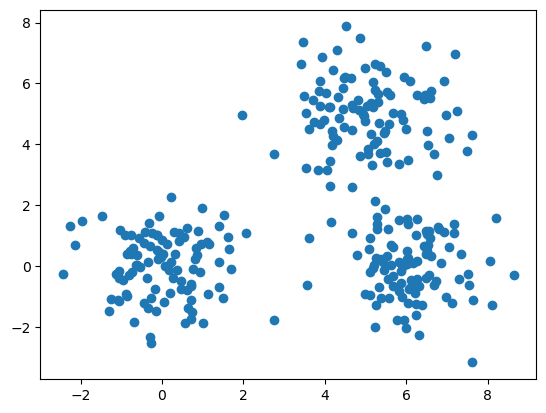

In [86]:
# visualize the data
plt.scatter(X[:,0], X[:,1])

In [87]:
# initialization 
# randomly assign cluster centers
cluster_centers = np.zeros((K,D))
for k in range(K):
    i = np.random.choice(N)
    cluster_centers[k] = X[i]

In [88]:
# k-means loop
max_iters = 20
cluster_identities = np.zeros(N)
saved_cluster_identities = []
for i in range(max_iters):
    # check for convergence
    old_cluster_identifiers = cluster_identities.copy()
    saved_cluster_identities.append(old_cluster_identifiers)
    
    # step 1: determine cluster identities
    for n in range(N):
        closest_k = -1
        min_dist = float('inf')
        for k in range(K):
            d = (X[n] - cluster_centers[k]).dot(X[n] - cluster_centers[k])
            if d < min_dist:
                min_dist = d
                closest_k = k
        cluster_identities[n] = closest_k
        
    # step 2: recalculate means
    for k in range(K):
        cluster_centers[k,:] = X[cluster_identities == k].mean(axis=0)
    
    # check for convergence
    if np.all(old_cluster_identifiers == cluster_identities):
        print(f"Converged after {i+1} iterations")
        break            

Converged after 3 iterations


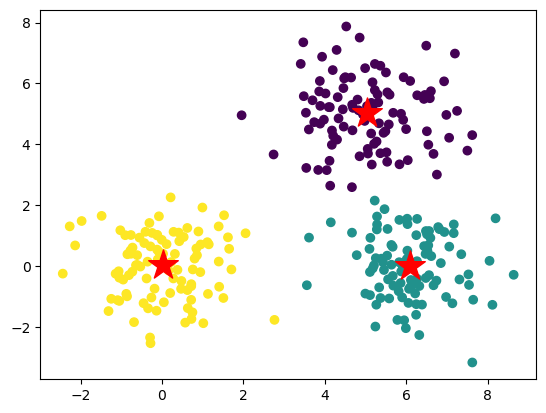

In [89]:
# plot for convergence
plt.scatter(X[:,0], X[:,1],c=cluster_identities);
plt.scatter(cluster_centers[:,0], cluster_centers[:,1],s=500,c='red',marker='*')

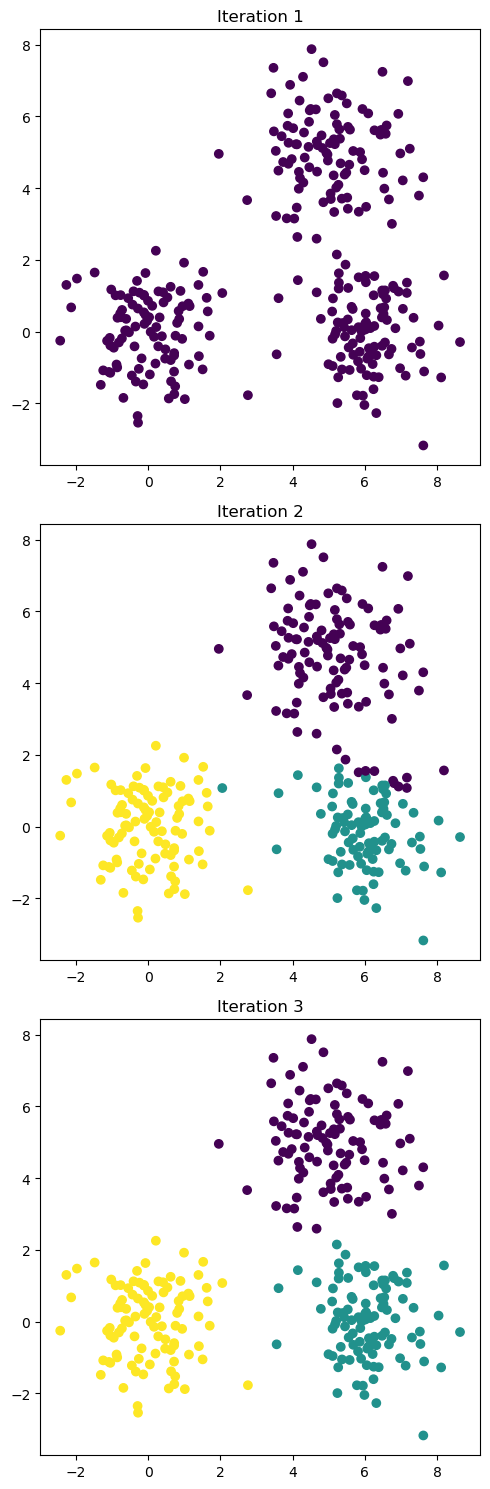

In [90]:
M = len(saved_cluster_identities)
fig, axes = plt.subplots(M, 1, figsize=(5, 5 * M))  # Create M subplots vertically

for i in range(M):
    ax = axes[i]  # Select the current subplot
    Y = saved_cluster_identities[i]
    ax.scatter(X[:, 0], X[:, 1], c=Y)  # Plot data
    ax.set_title(f"Iteration {i+1}")  # Set subplot title

plt.tight_layout()  # Adjust subplot layout to prevent overlap
plt.show()  # Show the plots
